In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [28]:
train = pd.read_csv(r'/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv(r'/kaggle/input/spaceship-titanic/test.csv')
testids = test['PassengerId']

In [29]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [30]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [32]:
print(train.isna().sum())
print('************************************')
print(test.isna().sum())


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
************************************
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def clean(df):
    df.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)
    # we drop them as they are (almost) unique for each record
    cat_col = ['HomePlanet','CryoSleep','Destination','VIP']
    # these are the columns with categorical data
    num_cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
    # these are the columns with numerical data
    for col in cat_col:
        df[col] = le.fit_transform(df[col])
    for col in cat_col:
        df.fillna(df[col].mode()[0],inplace=True)
    for col in num_cols:
        df.fillna(df[col].mean(),inplace=True)
    return df

train = clean(train)
test = clean(test)

In [34]:
print(train.isna().sum())
print('************************************')
print(test.isna().sum())
# we've filled all the NaN values

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64
************************************
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


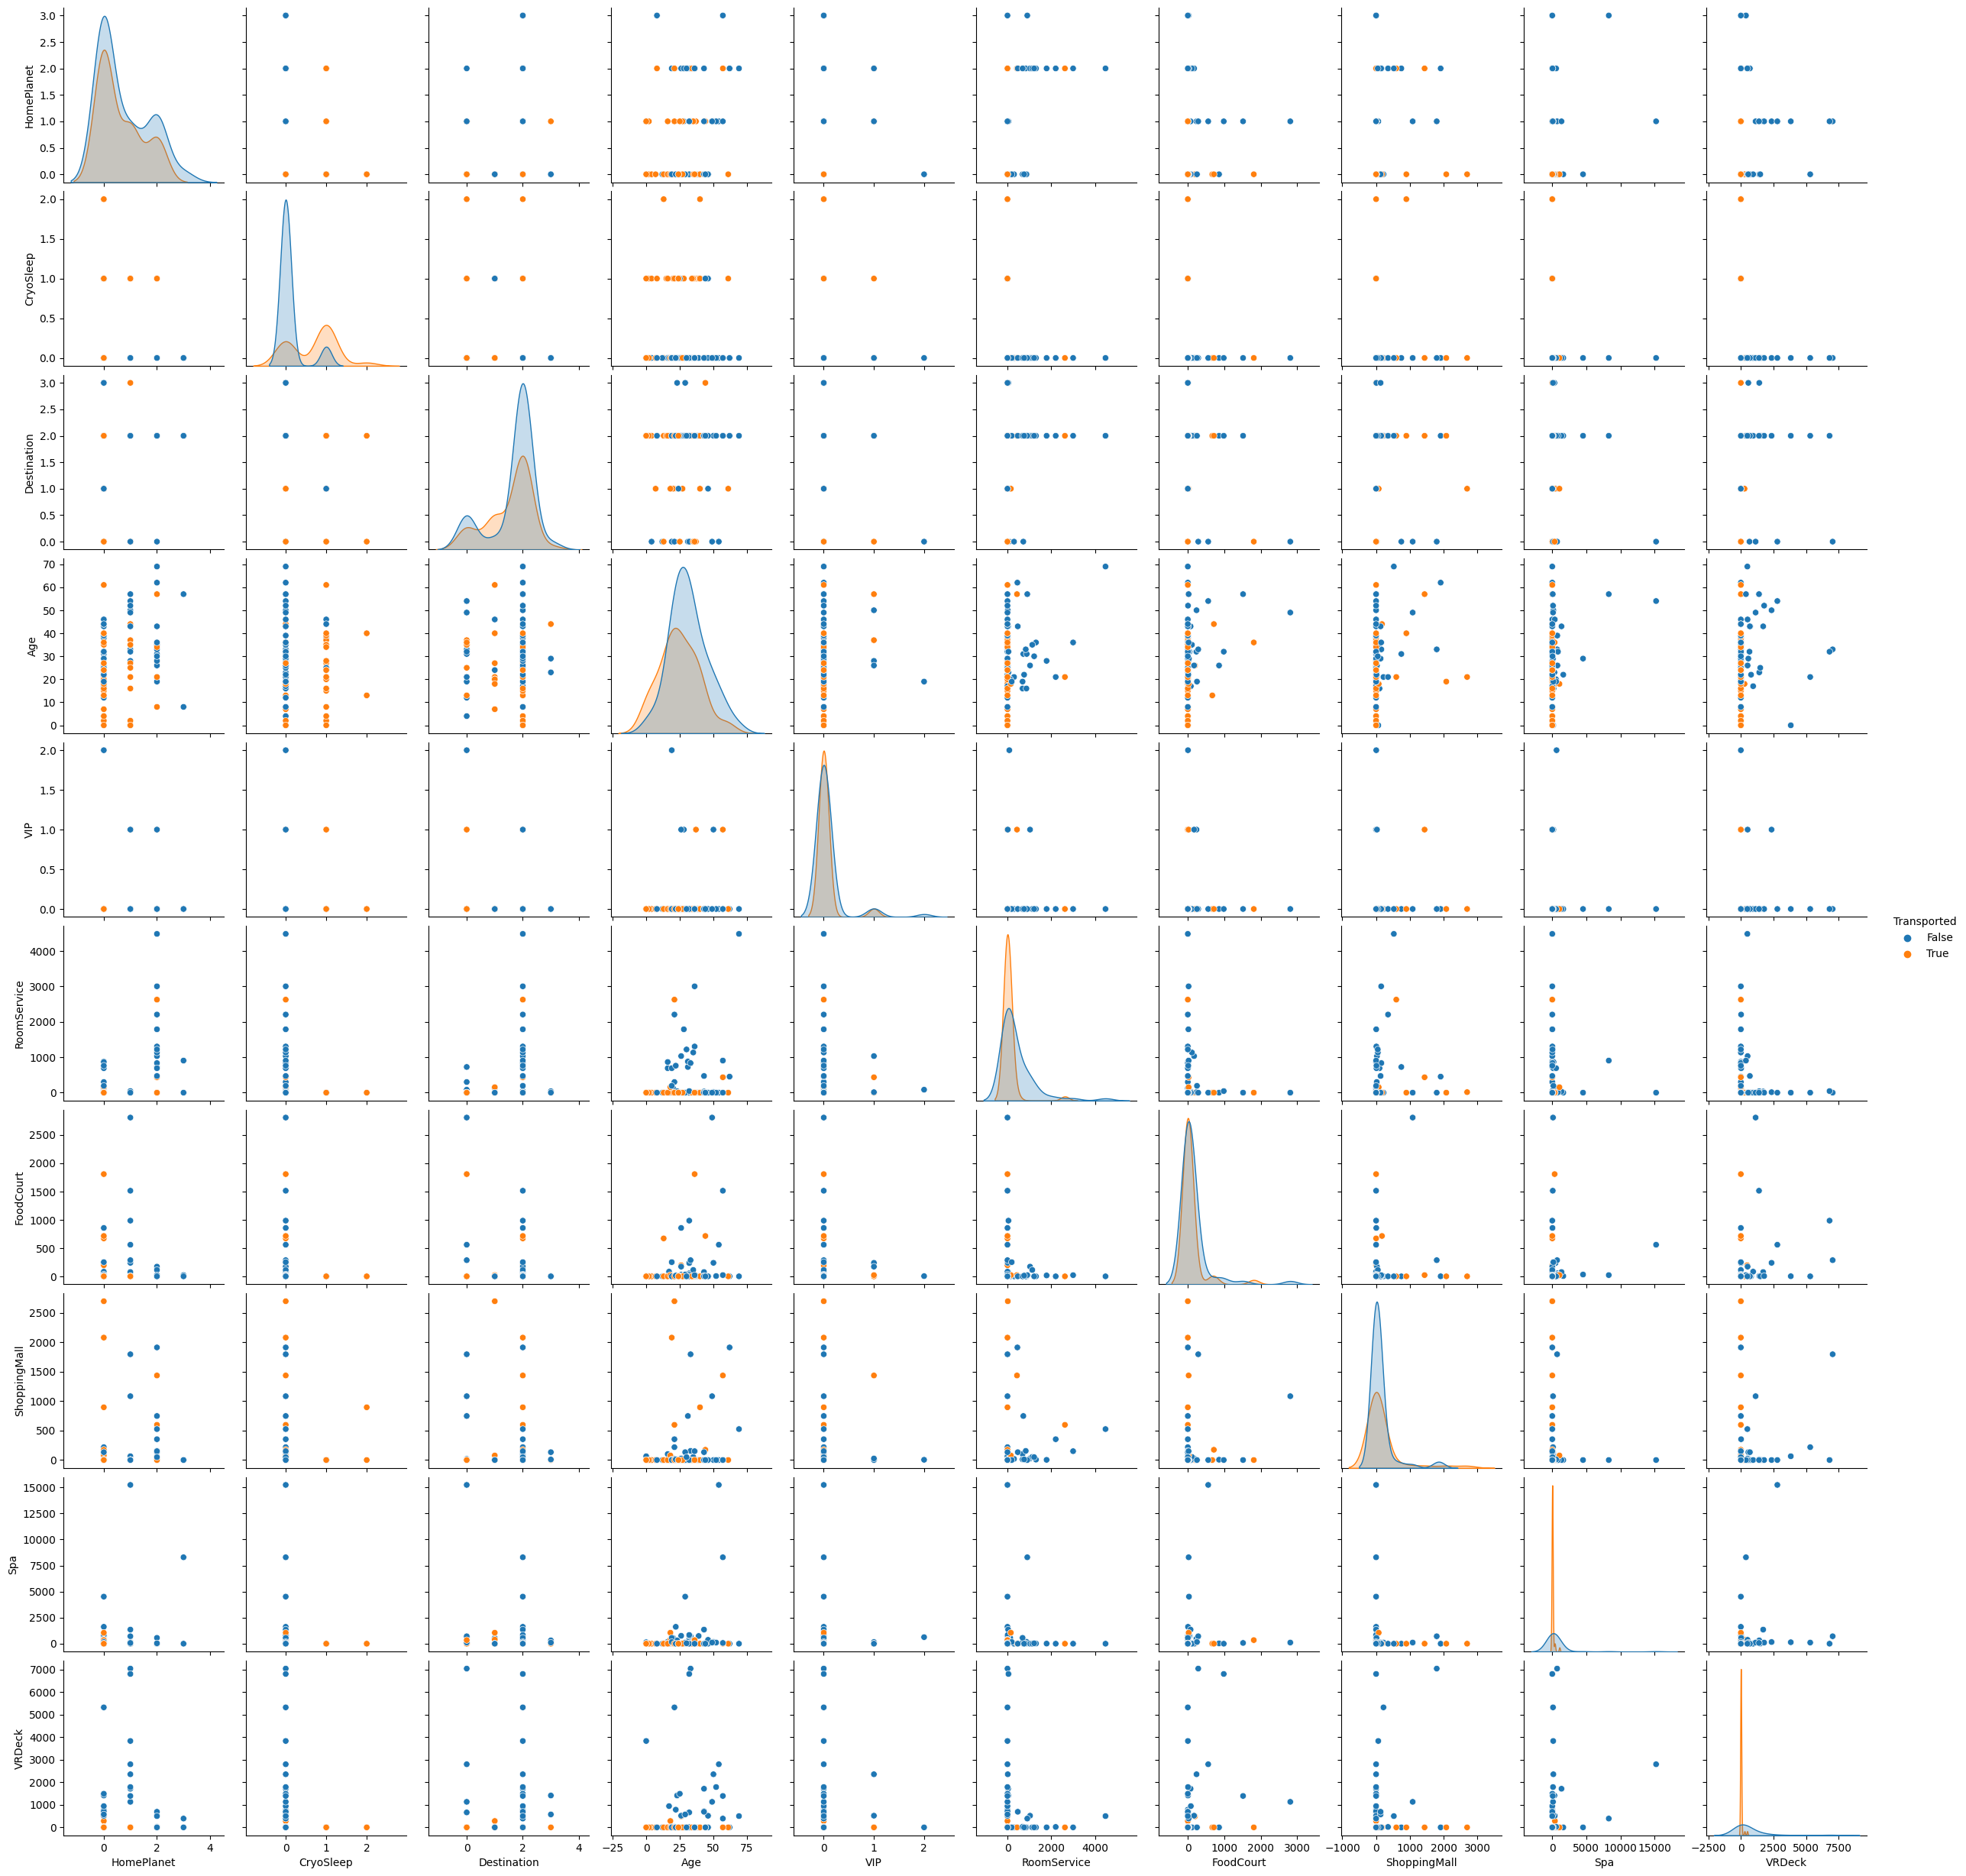

In [10]:
import seaborn as sns

sns.pairplot(train.sample(100),hue='Transported')

In [ ]:
# as we can see there is a bit of overlapping between the points. So, both Logistic Regression and KNearest Neighbors give almost same accuracy.
# let's check Decision Tree and Random Forest

# 1. Decision Tree

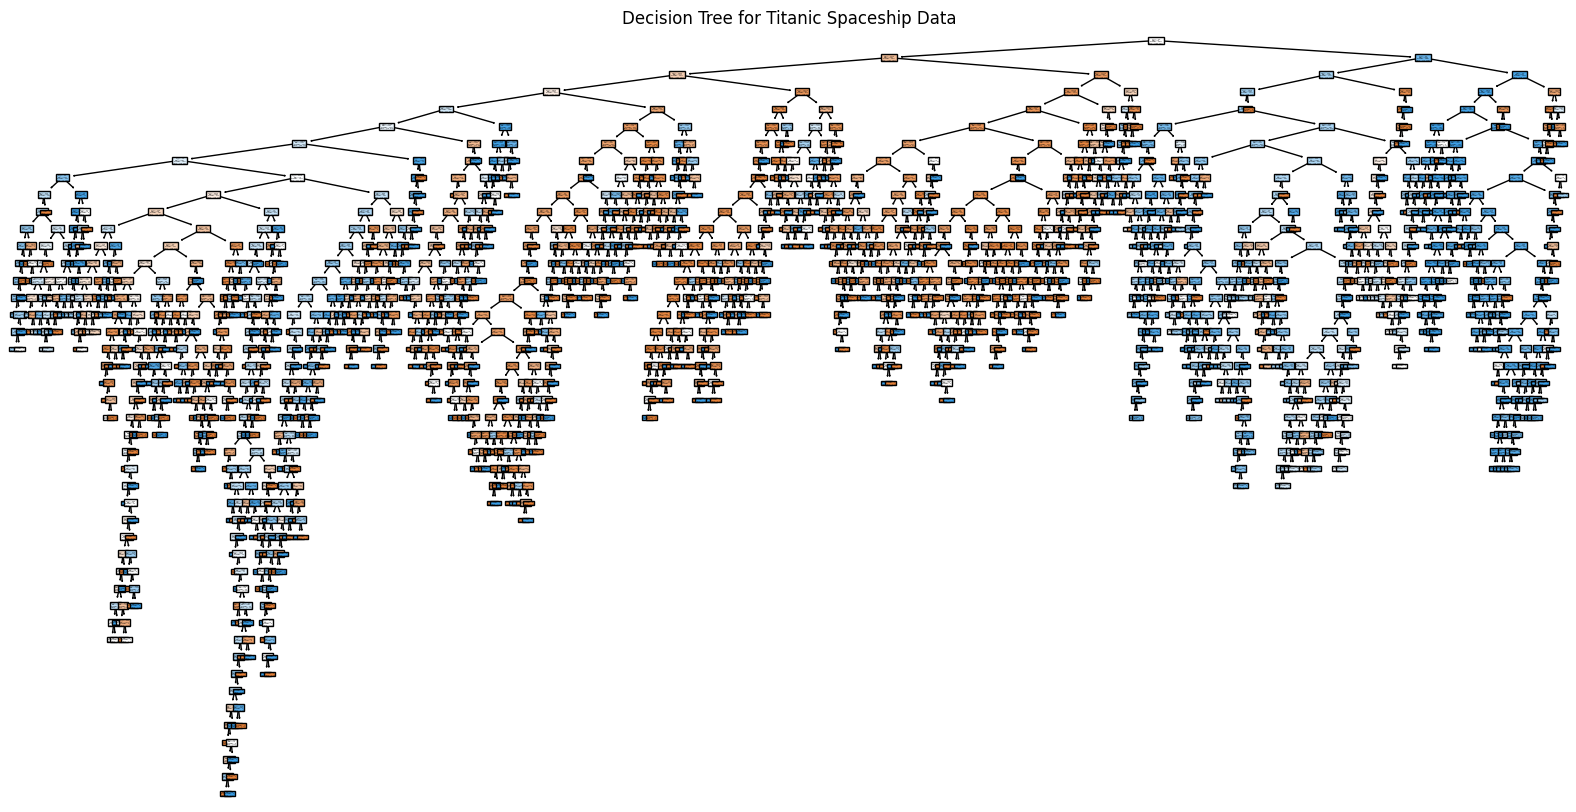

In [15]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = train.drop(['Transported'],axis=1)
y = train['Transported']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train,y_train)
DecisionTreeAccuracy = clf.score(X_test,y_test)
plt1 = plt.figure(figsize=(20,10))
plot_tree(clf,filled=True)
plt.title('Decision Tree for Titanic Spaceship Data')
plt.show()

# 2. K Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
KNNAccuracy = clf.score(X_test,y_test)

# 3. Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=10,max_iter=1000)
clf.fit(X_train,y_train)
LRAccuracy = clf.score(X_test,y_test)

# 4. Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(random_state=10)
clf.fit(X_train,y_train)
RFAccuracy = clf.score(X_test,y_test)

In [26]:
accuracy = pd.DataFrame({'DecisionTree':DecisionTreeAccuracy,'KNN':KNNAccuracy,'Logistic Regression':LRAccuracy,'Random Forest':RFAccuracy},index=['Accuracy'])
accuracy

,DecisionTree,KNN,Logistic Regression,Random Forest
Accuracy,0.748131,0.778608,0.791259,0.403228


# Among all these, the most accurate one is Logistic Regression, so lets use it

In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=10,max_iter=1000)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7912593444508338

In [36]:
preds = clf.predict(test)
sub_df = pd.DataFrame({'PassengerId':testids,'Transported':preds})
sub_df.to_csv('submission_df',index=False)
sub_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
